In [31]:
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

size_p = 30
generations = 1000

x_data = np.random.normal(size=15)
y_data = np.random.normal(size=15)

population = [((random.uniform(-1,1)), random.uniform(-1,1))]

for i in range(size_p-1):
    population.append(((random.uniform(-1,1)), random.uniform(-1,1)))


C:\Users\horrl\AppData\Local\Temp/ipykernel_4396/433566591.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [32]:
import pygad

def crossover_func(parents, offspring_size, ga_instance):
    offspring = parents[0].copy()
    a = random.uniform(0,1)
    f1 = parents[0]
    f2 = parents[1]
    f3 = parents[2]

    offspring[0]=(f1[0]+f2[0]+f3[0])/3
    offspring[1]=(f1[1]+f2[1]+f3[1])/3
    return offspring
    
def mutation_func(offspring, ga_instance):
    offspring[0] += random.uniform(-1.5, 1.5)
    offspring[1] += random.uniform(-1.5, 1.5)
    return offspring

def fitness_func(solution, solution_idx):
    sum_distance = 0
    func = population[solution_idx]
    k = func[0]
    b = func[1]
    for i in range(15):
        x_inter = ((y_data[i]+x_data[i]/k-b)/(k+(1/k)))
        y_inter = (k * x_inter + b)
        sum_distance += math.sqrt((x_data[i]-x_inter)**2+(y_data[i]-y_inter)**2)
    return -(sum_distance)

In [33]:
ga_instance = pygad.GA(
    num_generations=generations,
    num_parents_mating=3,
    sol_per_pop=size_p,
    initial_population=population,
    fitness_func=fitness_func,
        crossover_type=crossover_func,
    mutation_type=mutation_func
)

c:\Users\horrl\AppData\Local\Programs\Python\Python38\lib\site-packages\pygad\pygad.py:469: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


In [34]:
ga_instance.run()

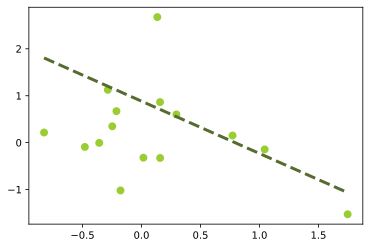

In [35]:
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)

a = solution[0]
b = solution[1]

axis = np.r_[min(x_data):max(x_data):0.01]
line = np.r_[min(x_data):max(x_data):0.01]
line[::] = [a*x + b for x in line[::]]

%matplotlib inline

plt.plot(axis, line, linewidth=3, color = 'darkolivegreen', linestyle = 'dashed')
plt.scatter(x_data, y_data, linewidth=2, color = 'yellowgreen')
plt.show()